In [62]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [38]:
meas_df = pd.read_csv('./datasets/merge-1011.csv', sep=",")
corrM = meas_df.corr()
print('Covariance matrix :')
print(corrM.iloc[4::,0:4])

Covariance matrix :
           IR0_cam   IR1_cam   IR2_cam   IR3_cam
IR0_meas  0.114018 -0.944437  0.022174  0.560356
IR1_meas  0.773435 -0.008685 -0.861777  0.154347
IR2_meas -0.875817 -0.039410  0.804293 -0.032913
IR3_meas -0.105552  0.645334  0.179567 -0.807512


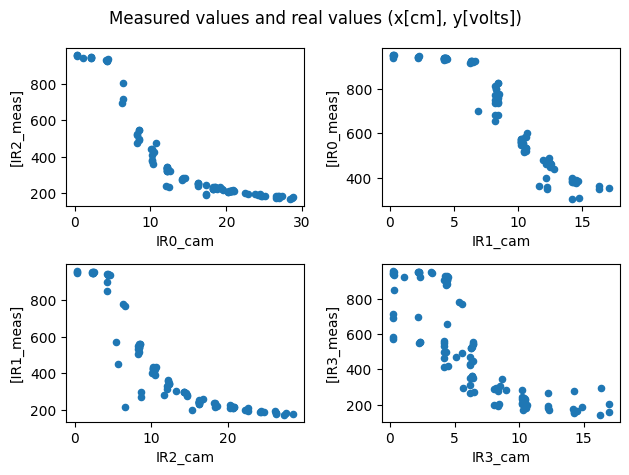

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle('Measured values and real values (x[cm], y[volts])')
meas_df.plot(ax=axes[0,0],x="IR0_cam", y=["IR2_meas"],kind ="scatter")
meas_df.plot(ax=axes[0,1],x="IR1_cam", y=["IR0_meas"],kind ="scatter")
meas_df.plot(ax=axes[1,0],x="IR2_cam", y=["IR1_meas"],kind ="scatter")
meas_df.plot(ax=axes[1,1],x="IR3_cam", y=["IR3_meas"],kind ="scatter")
plt.tight_layout()

In [63]:
from sklearn.neural_network import MLPRegressor

In [175]:
clf = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')
x = np.array(meas_df.iloc[:,6]).reshape(1,-1)
y = np.array(meas_df.iloc[:,0]).reshape(1,-1)
# print(train_targets)
clf.fit(x, y)
res = clf.predict(x)
# print(y)
# print(res)
df_temp = pd.DataFrame({'Actual': [y.reshape(-1,1)], 'Predicted': [res.reshape(-1,1)]})
print(y.reshape(-1,1))
# df_temp.plot(x="Actual", y=["Predicted"],kind ="scatter")

[[12.23]
 [12.23]
 [12.23]
 [12.23]
 [12.21]
 [12.22]
 [12.21]
 [12.21]
 [10.24]
 [ 6.38]
 [ 4.23]
 [ 2.21]
 [ 0.3 ]
 [ 0.26]
 [20.27]
 [22.89]
 [24.77]
 [28.84]
 [28.38]
 [28.62]
 [26.69]
 [26.92]
 [26.59]
 [26.69]
 [24.61]
 [25.14]
 [ 2.2 ]
 [14.21]
 [18.24]
 [18.23]
 [18.23]
 [18.31]
 [20.38]
 [ 0.3 ]
 [ 1.07]
 [ 4.38]
 [ 8.21]
 [10.2 ]
 [14.21]
 [16.21]
 [19.42]
 [17.33]
 [12.01]
 [10.29]
 [10.75]
 [10.25]
 [12.49]
 [19.22]
 [16.28]
 [18.84]
 [20.69]
 [20.84]
 [20.6 ]
 [20.6 ]
 [20.6 ]
 [18.25]
 [16.31]
 [16.31]
 [17.39]
 [ 2.2 ]
 [ 6.36]
 [ 8.21]
 [10.26]
 [12.21]
 [18.54]
 [22.51]
 [26.59]
 [27.36]
 [26.8 ]
 [26.92]
 [18.49]
 [20.86]
 [17.33]
 [19.54]
 [24.48]
 [ 2.2 ]
 [ 4.22]
 [ 4.2 ]
 [ 6.2 ]
 [ 8.43]
 [ 8.29]
 [ 8.49]
 [ 8.43]
 [ 8.55]
 [10.1 ]
 [14.24]
 [16.21]
 [18.45]
 [21.05]
 [23.75]
 [24.2 ]
 [14.57]
 [18.45]
 [20.64]
 [20.23]
 [20.44]
 [12.2 ]
 [12.64]
 [10.47]]
